In [32]:
!pip install geopandas;
!pip install earthpy

     |████████████████████████████████| 1.4 MB 5.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 


In [57]:
#Import geopandas
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pyproj
import pandas as pd
import h5py    
import numpy as np

In [34]:
##path
path_to_data = '/content/drive/MyDrive/2021-MAESTRIA-OMAR-CASTAÑO/earth observation datasets/sentinel 2 - south africa - radiant_earth crop type 35GB/train_16revs_uint8'

In [35]:
africa_crop_chips = h5py.File(path_to_data + "/fields_info.hdf")
np.array(africa_crop_chips['data'])

array(['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items',
       'block1_values', 'block2_items', 'block2_values'], dtype='<U13')

In [75]:
#Load chip
chip_dict = pd.read_pickle(path_to_data + '/TR0003.pkl')
chip_dict.keys()

dict_keys(['chip_id', 'chip', 'timesteps', 'labels', 'field_ids', 'bands', 'timesteps_withno_clouds', 'geometry', 'bbox'])

In [76]:
chip_dict['bands']

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B11',
 'B12',
 'CLM']

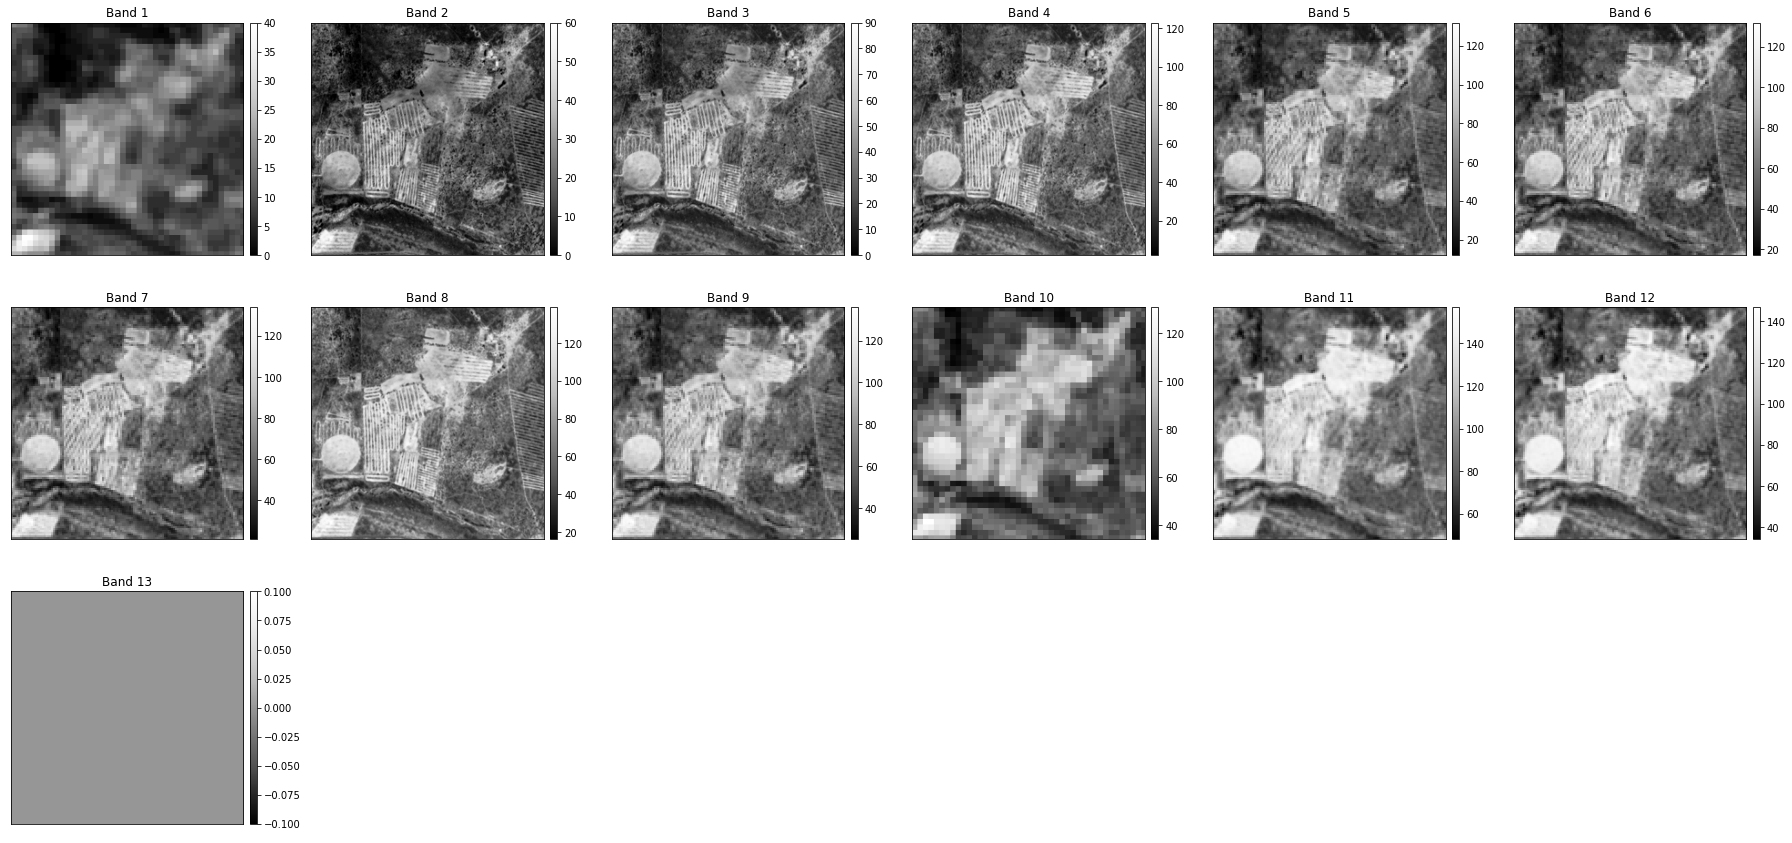

In [77]:
#plot bands
ep.plot_bands(chip_dict['chip'][0], cols=6, figsize=(25,12));

In [86]:
def visualize_one_image(chip_dict):
    t = 1 ## alpha value
    cmap = {0:[1.0,0.5,0.5,t],1:[0.0,0.5,0.1,t],2:[1.0,0.2,0.1,t], 3:[0.5,0.5,0.1,t], 4:[0.1,0.1,1.0,t], 5:[1.0,1.0,0.1,t], 
                                                                             6:[1.0,0.5,1.0,t],7:[0.6, 0.5,0.8,t], 8:[0.3,0.2,0.2,t], 9:[0.7,0.9,0.7,t]}
    labels_pam = {0:'No Data', 1:'Lucerne/Medics', 2:'Planted pastures', 3:'Fallow', 4:'Wine grapes', 5:'Weeds', 6:'Small grain grazing',
                                                                                         7:'Wheat', 8:'Canola', 9:'Rooibos'}
    patches =[mpatches.Patch(color=cmap[i], label=labels_pam[i]) for i in cmap]

    fig, ax = plt.subplots(1, 2, figsize=(15,12))


    ep.plot_rgb(chip_dict['chip'][0], rgb=(3,2,1), stretch=True, str_clip=0.1, ax=ax[0])
    ax[1].imshow(chip_dict['labels'])

    arrayShow = np.array([[cmap[i] for i in j] for j in chip_dict['labels']])  
    ax[1].imshow(arrayShow)
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , markerscale=30, fontsize ='xx-large')

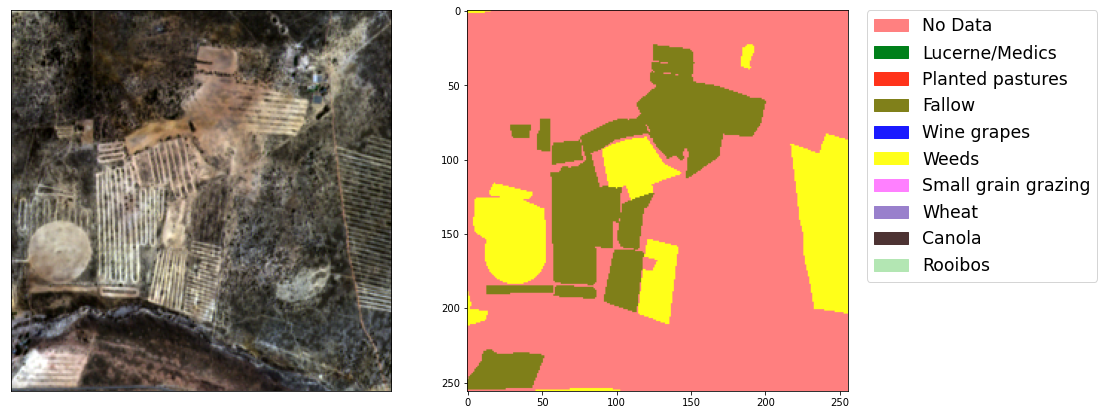

In [87]:
visualize_one_image(chip_dict)